# **House prices**

A regressão é uma técnica estatística amplamente utilizada, que permite modelar e prever a relação entre variáveis, oferecendo insights valiosos para a compreensão de fenômenos e a tomada de decisões. Neste notebook, é apresentado um trabalho de regressão utilizando a linguagem de programação Python, realizado com o objetivo de prever o preço de casas da cidade de Aimes, em Iowa. Para isso, foi utilizado os dados de treino train.csv disponibilizado pelo Kaggle, plataforma de Aprendizado de Máquina e Ciência de Dados que oferece diversos conjuntos de dados públicos para desafios e análises de dados. Assim, será apresentado as etapas do processo e os resultados obtidos.


## **Imports**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

## **Leitura dos dados**

In [142]:
df = pd.read_csv("train.csv")
df = df.drop(["Id"], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **AED**

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [101]:
# Observando as estatisticas das variaveis numericas
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Distribuição das variáveis**

C:\Users\CamilaHiura\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


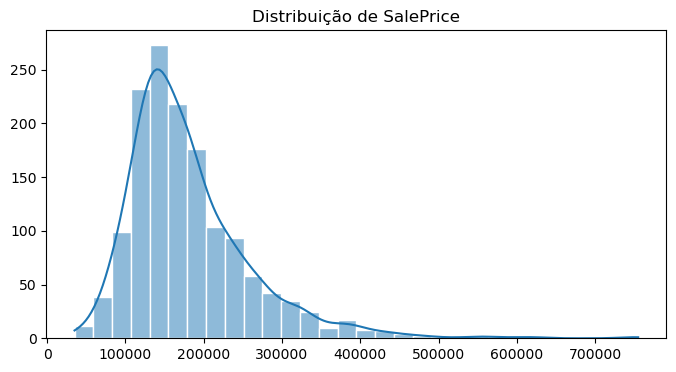

In [94]:
# Distribuição da variável resposta
plt.figure(figsize = (8,4))
sns.histplot(df['SalePrice'], kde=True, bins=30, edgecolor = "white")
plt.title("Distribuição de SalePrice")
plt.xlabel('')
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

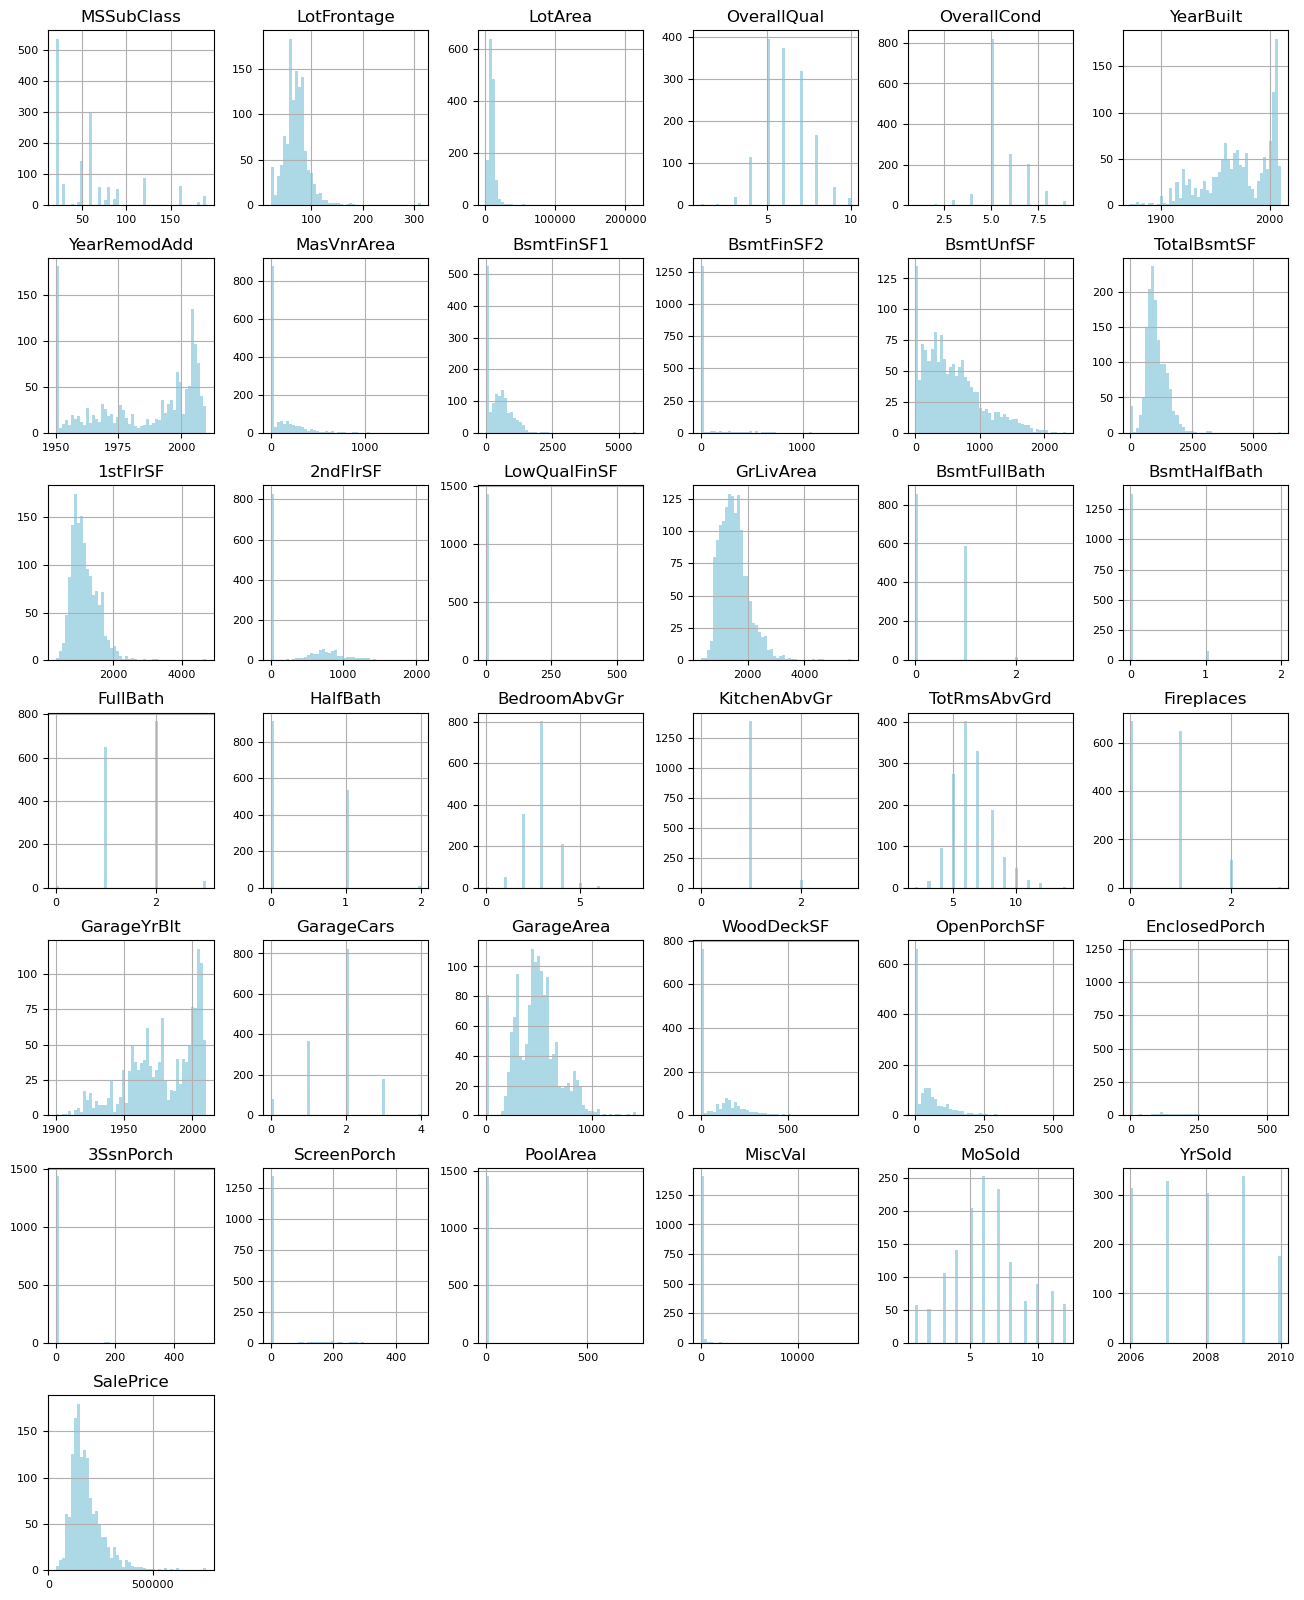

In [115]:
# Distribuição das variáveis numéricas
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color = "lightblue")

**Boxplot**

In [3]:
categoricas = df.select_dtypes(include=["object"])
numericas = df.select_dtypes(include=["number"])

<Axes: >

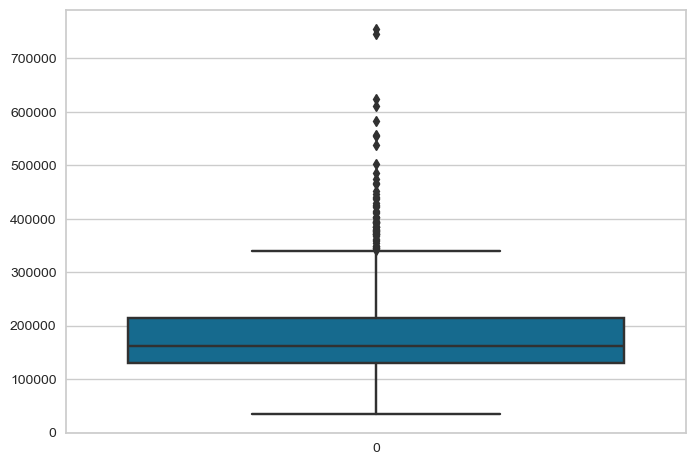

In [102]:
sns.boxplot(df["SalePrice"])

In [62]:
numericas = df.select_dtypes(include=["number"]).drop("SalePrice", axis=1)
count = 0

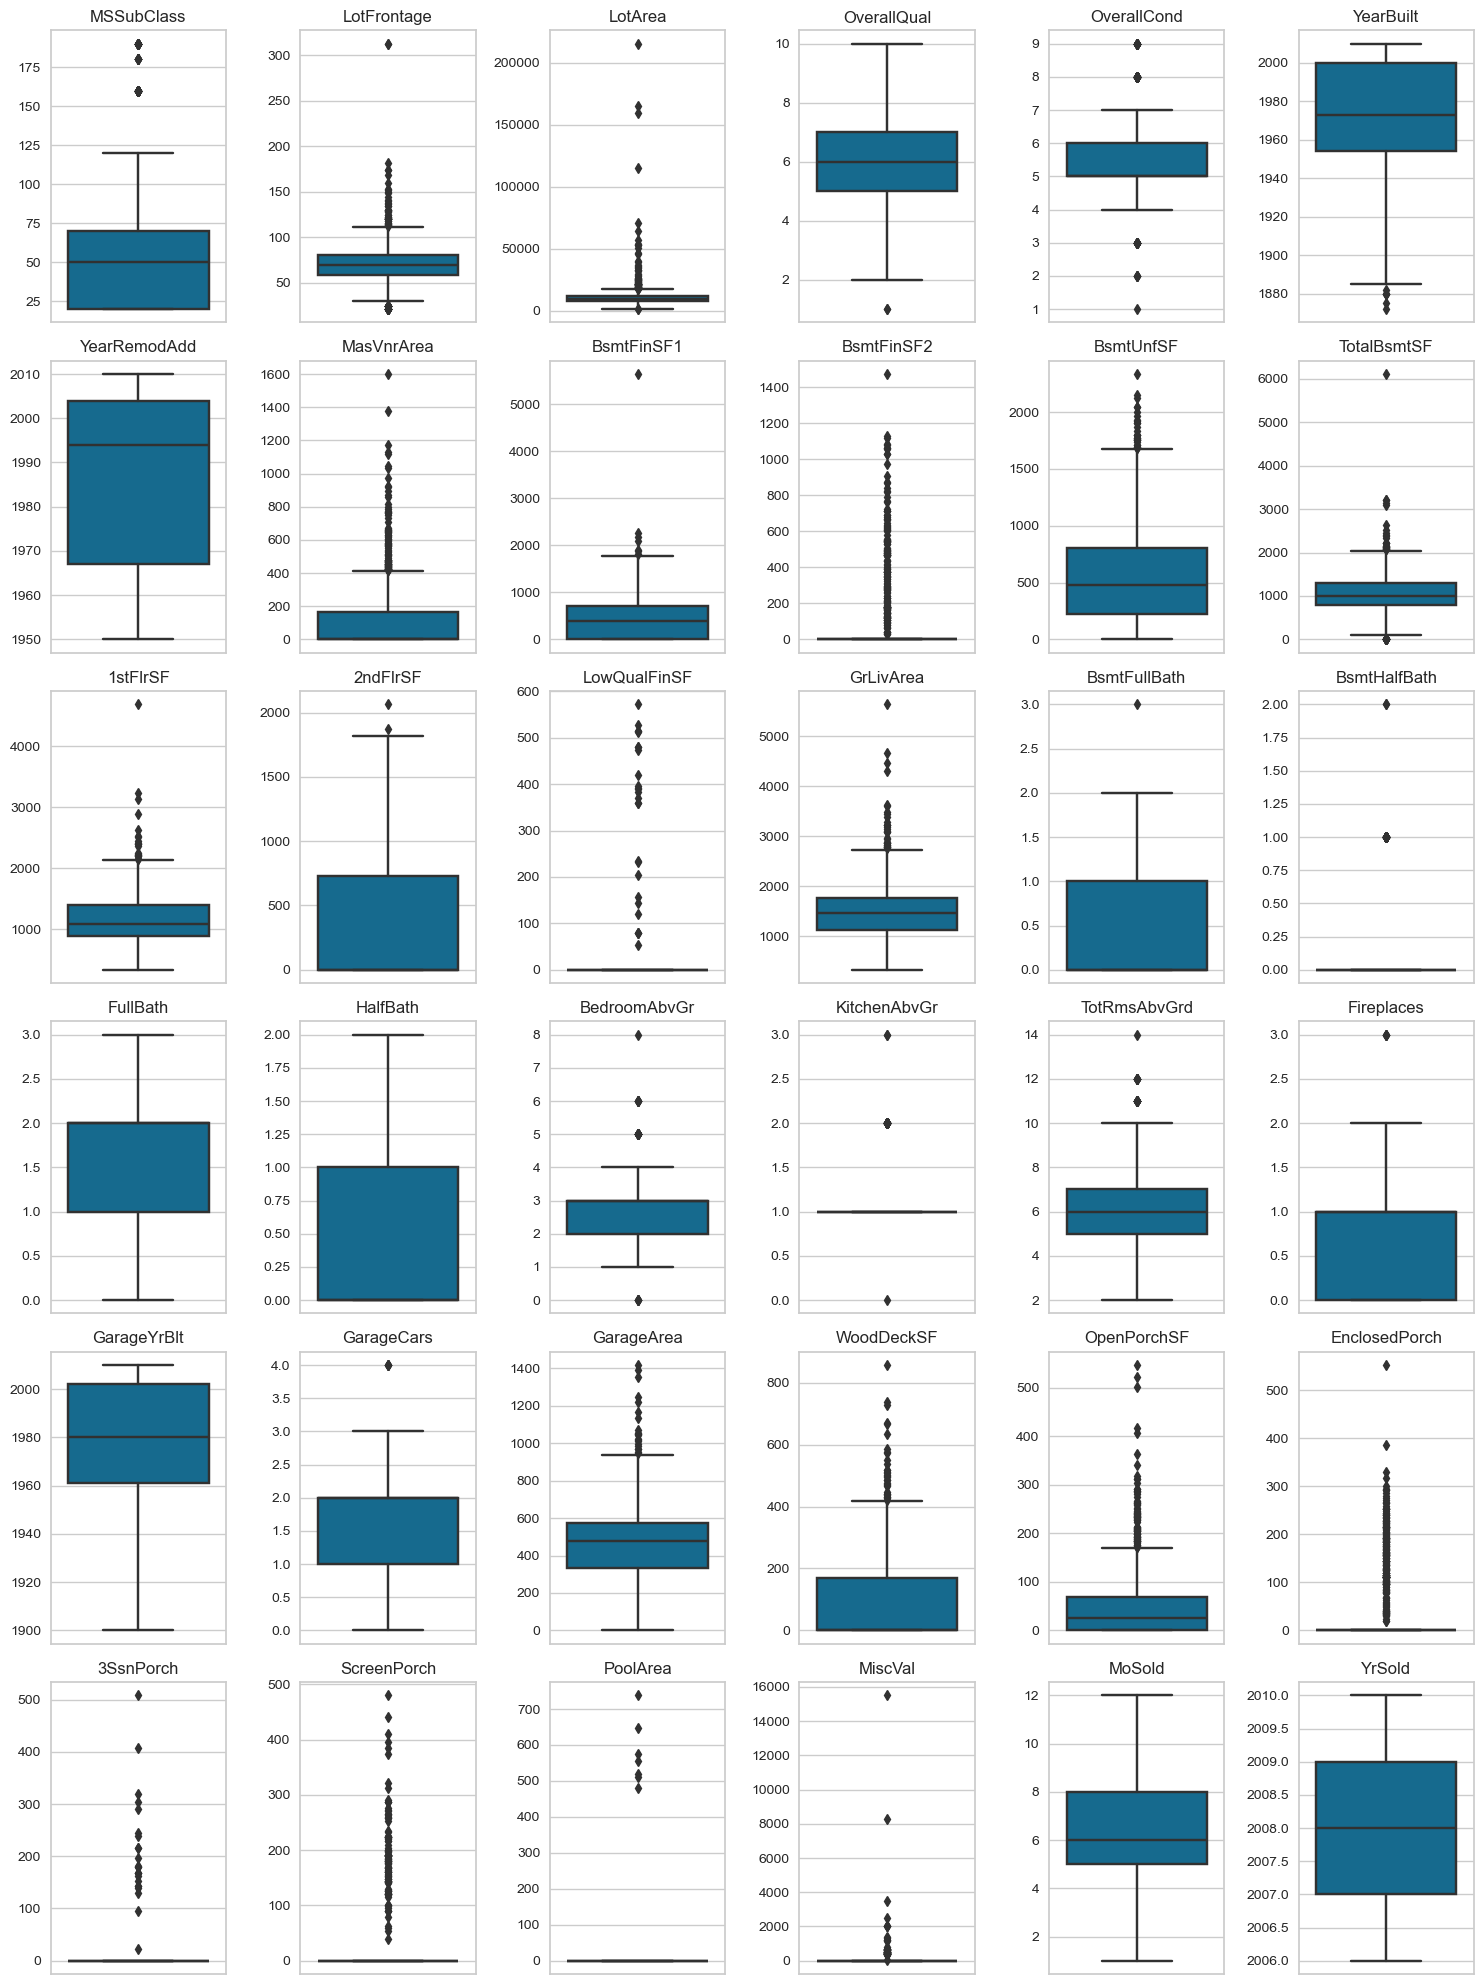

In [103]:
# Criando subplots
fig, axes = plt.subplots(6, 6, figsize=(15, 20))

# Iterando sobre as colunas "object" e criando os boxplots
for i, column in enumerate(numericas):
    row = i // 6
    col = i % 6
    sns.boxplot(data = numericas, y = column, ax=axes[row, col])
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("")
    axes[row, col].set_title(column)
    
# Ajustando layout
plt.tight_layout()
plt.show()

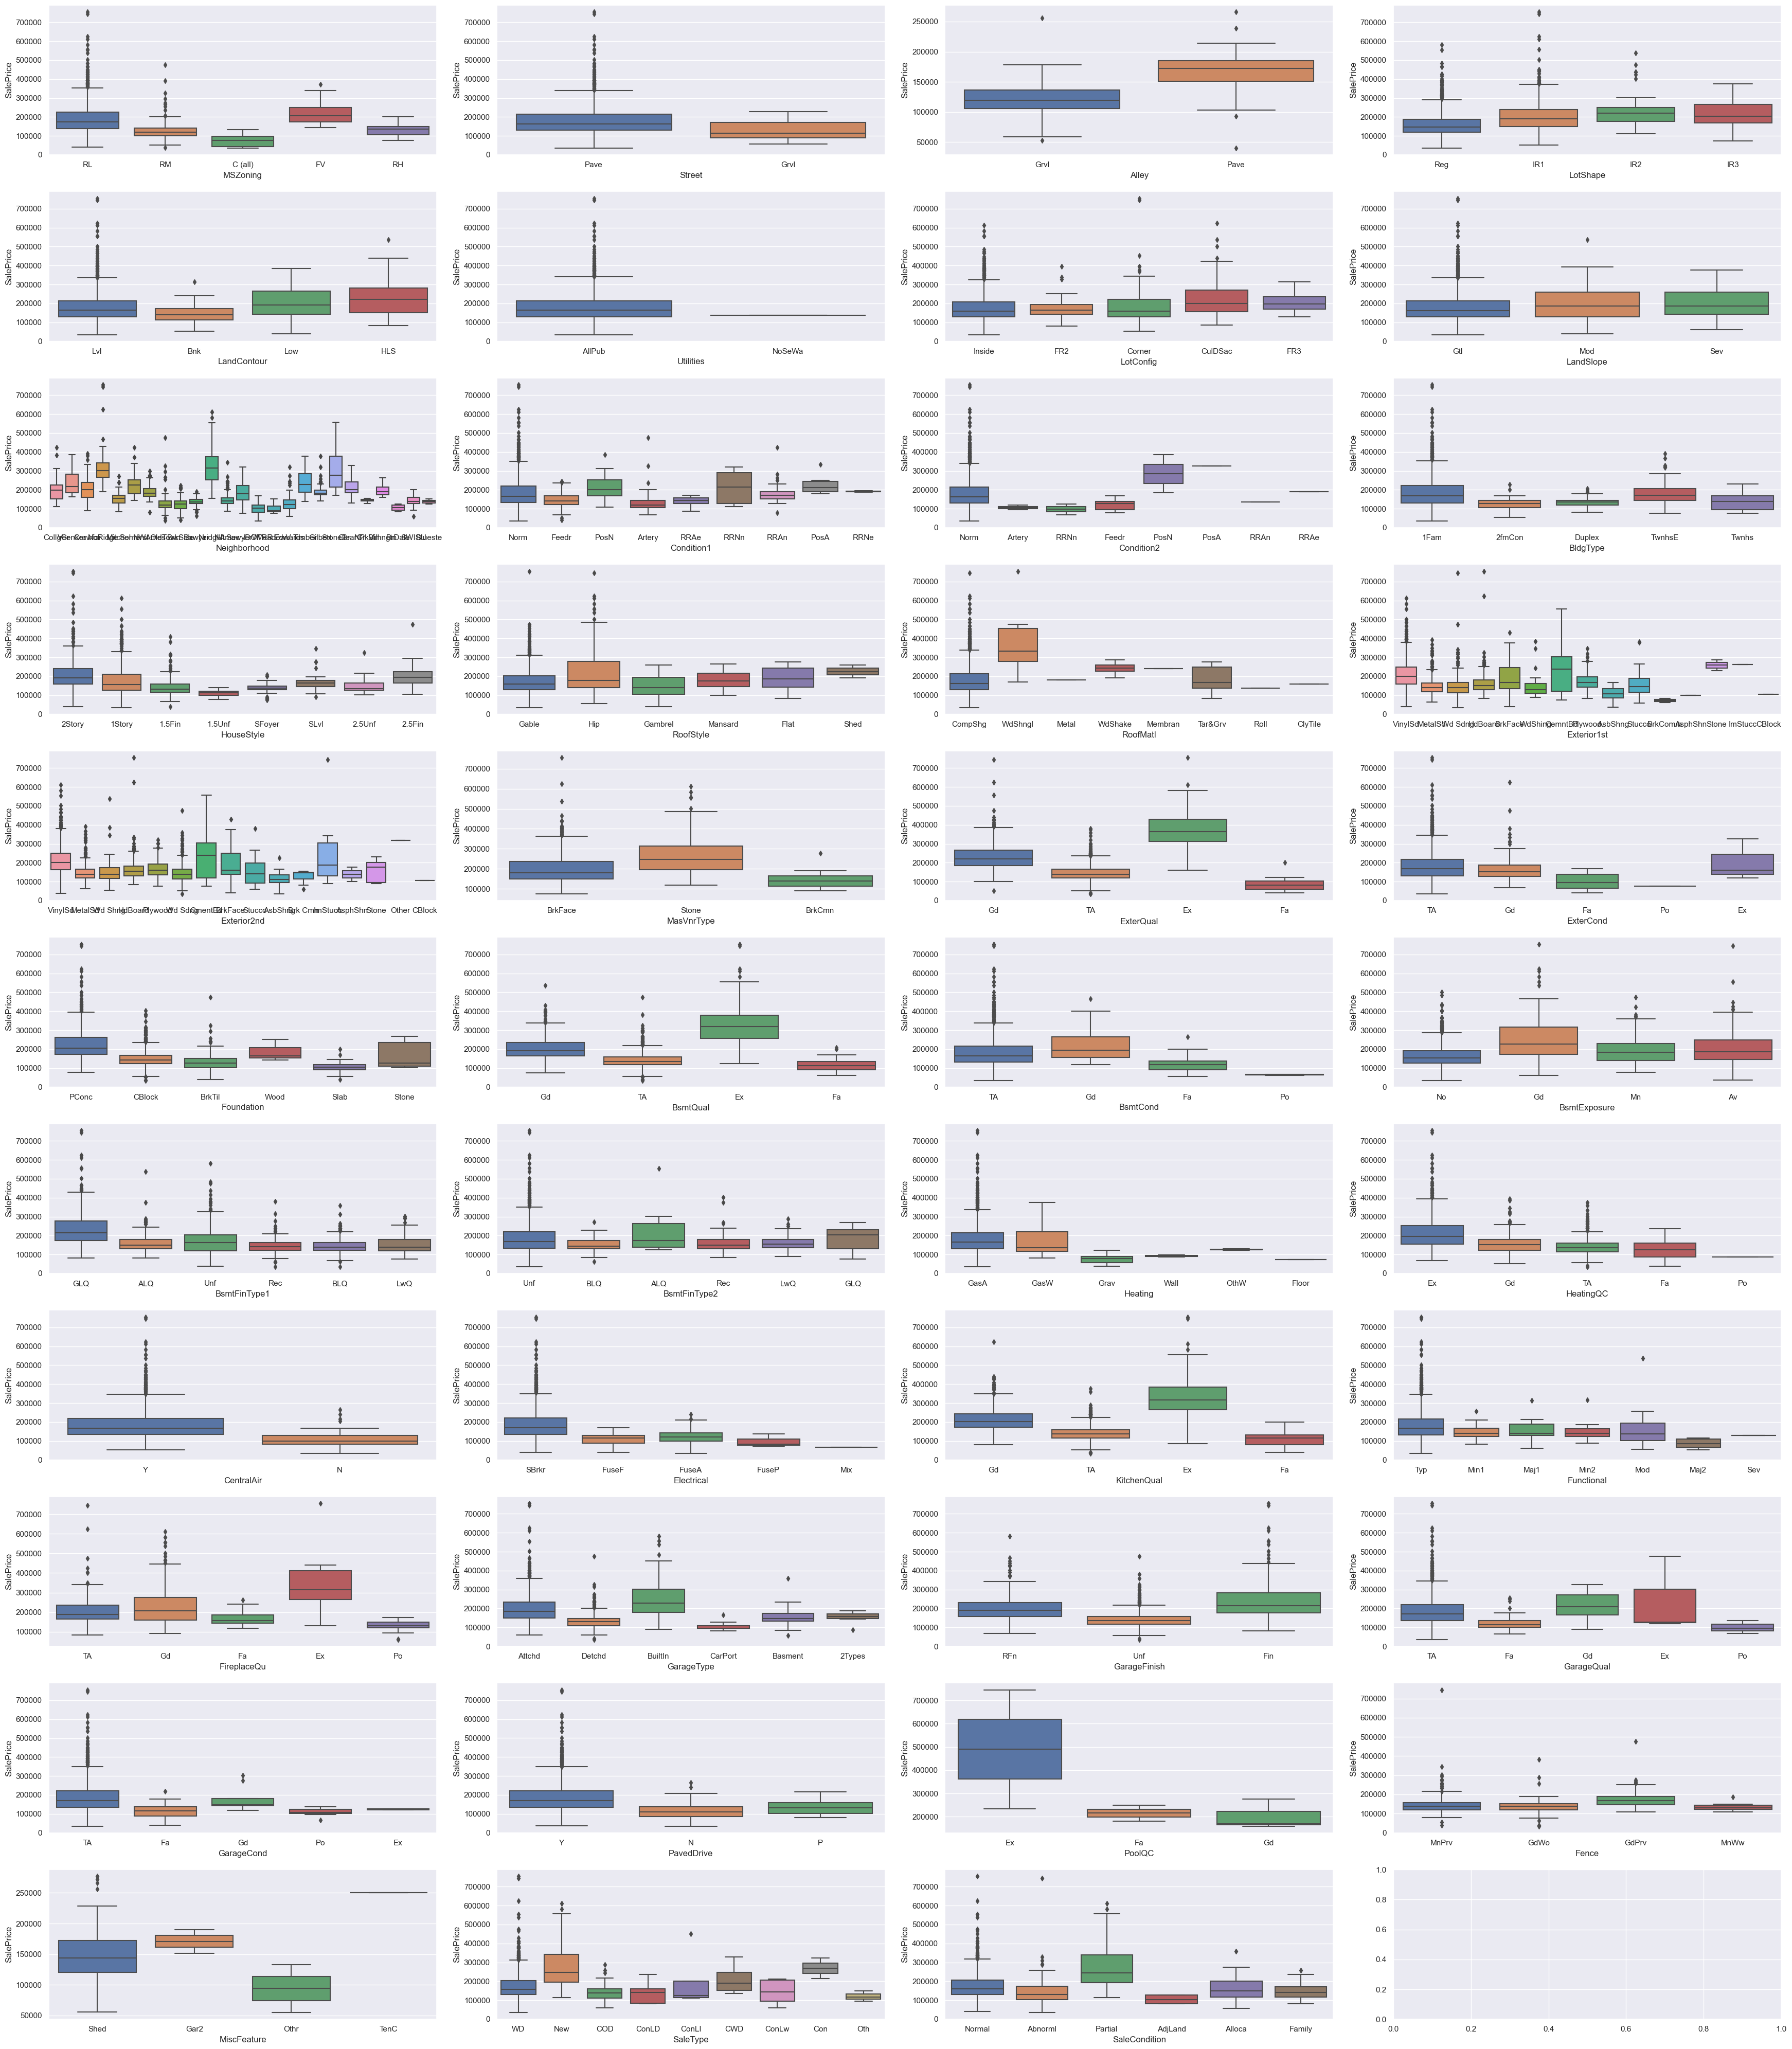

In [70]:
# Criando subplots
fig, axes = plt.subplots(11, 4, figsize=(35, 40))

# Iterando sobre as colunas "object" e criando os boxplots
for i, column in enumerate(df.select_dtypes(include=["object"])):
    row = i // 4
    col = i % 4
    sns.boxplot(data=df, x=column, y="SalePrice", ax=axes[row, col])

# Ajustando layout
plt.tight_layout()
plt.show()

**Grafico de dispersao**

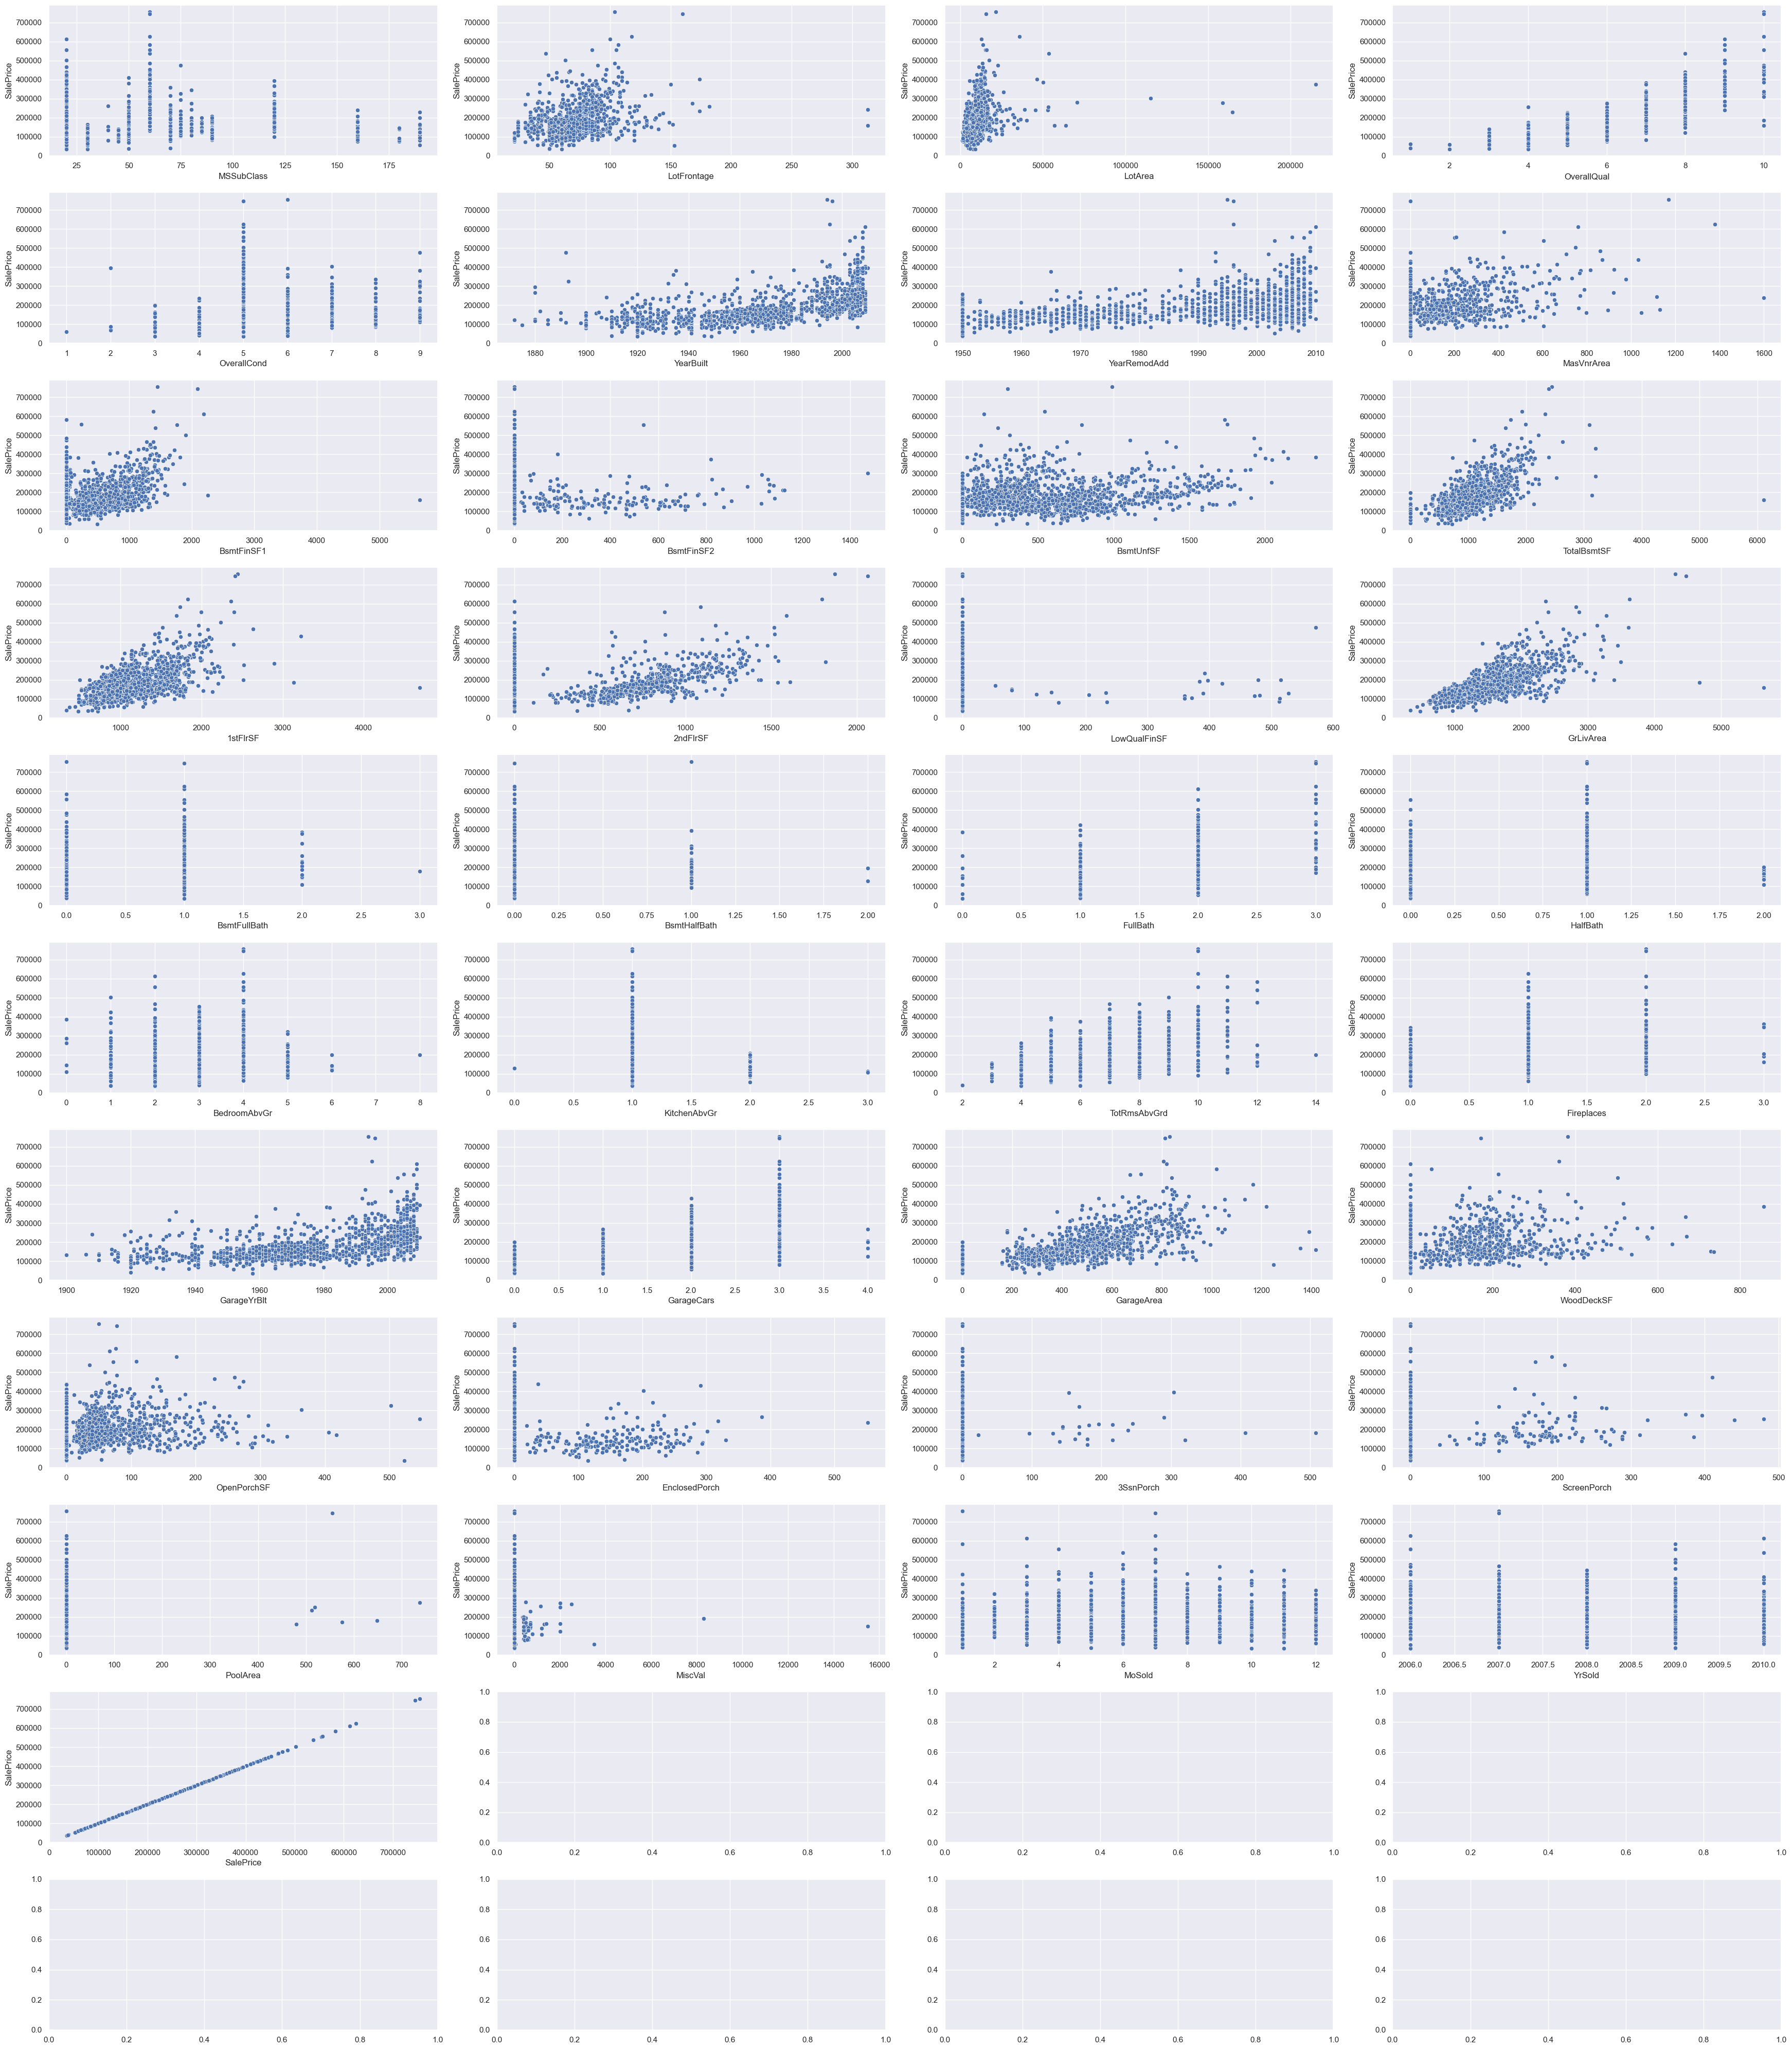

In [80]:
fig, axes = plt.subplots(11, 4, figsize=(35, 40))

# Iterando sobre as colunas "object" e criando os boxplots
for i, column in enumerate(df.select_dtypes(include=["number"])):
    row = i // 4
    col = i % 4
    sns.scatterplot(data=df, x=column, y="SalePrice", ax=axes[row, col])

# Ajustando layout
plt.tight_layout()
plt.show()

(array([2005.5, 2006. , 2006.5, 2007. , 2007.5, 2008. , 2008.5, 2009. ,
        2009.5, 2010. , 2010.5]),
 [Text(2005.5, 0, '2005.5'),
  Text(2006.0, 0, '2006.0'),
  Text(2006.5, 0, '2006.5'),
  Text(2007.0, 0, '2007.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2008.0, 0, '2008.0'),
  Text(2008.5, 0, '2008.5'),
  Text(2009.0, 0, '2009.0'),
  Text(2009.5, 0, '2009.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2010.5, 0, '2010.5')])

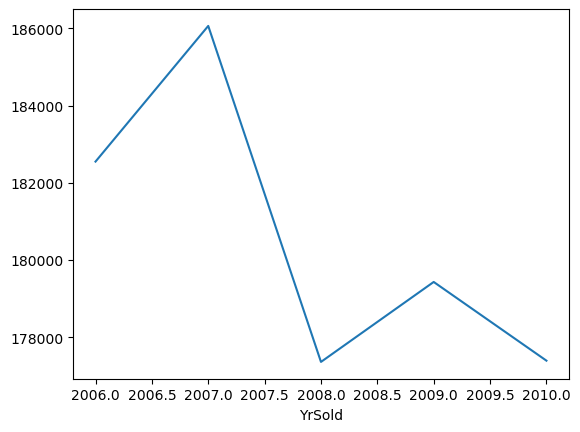

In [112]:
average_saleprice_by_year = df.groupby("YrSold")["SalePrice"].mean()
average_saleprice_by_year.plot()
plt.xticks()

In [ ]:
df["YrSold"].unique()

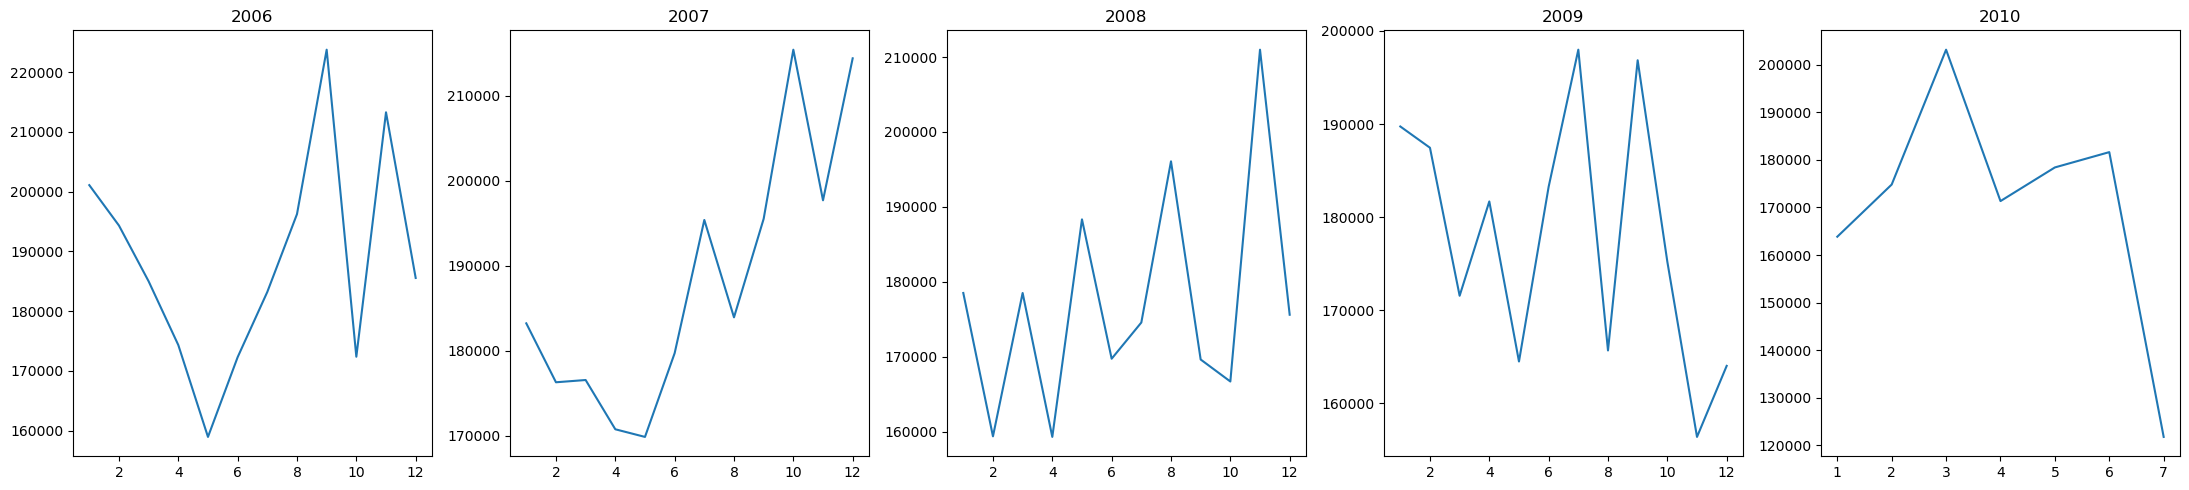

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (22,5))

for idx, year in enumerate(sorted(df["YrSold"].unique())):
    df_ano = df[df["YrSold"]==year]
    average_saleprice_by_month = df_ano.groupby("MoSold")["SalePrice"].mean()
    ax[idx].plot(average_saleprice_by_month.index, average_saleprice_by_month.values, label = str(year))
    ax[idx].set_title(year)
plt.tight_layout()
plt.show()

In [277]:
df_teste = df.copy()

In [279]:
df_teste["anos"] = df_teste["YrSold"] - df_teste["YearBuilt"]

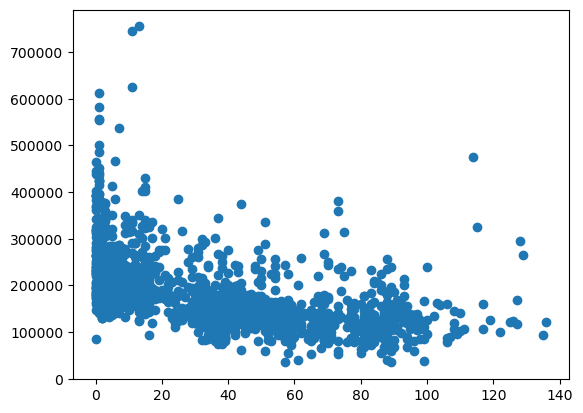

## Pré processamento dos dados

In [130]:
# Informacoes sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
df.duplicated().sum()

In [127]:
# Porcentagem de valores nan por coluna
qnt_nulos = df.isna().sum()[df.isna().sum()>0]
porcentagem_nulos = round(df.isna().sum()[df.isna().sum()>0]/len(df)*100,2)

nulos = pd.DataFrame({"Quantidade": qnt_nulos, "Porcentagem": porcentagem_nulos})
nulos.sort_values(by=['Porcentagem'], ascending=False)

,Quantidade,Porcentagem
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


As variáveis *PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond e BsmtQual* são variáveis categóricas que possuem valores nan. No entanto, pelo data_description fornecido pelo desafio esses valores nan podem corresponder a ausência de determinadas características e não apenas a falta de dado.

A variável *Electrical* é uma variável categórica com valores nan

As variáveis *LotFrontage e MasVnrArea* são variáveis numéricas com valores nan.

GarageYrBlt

In [143]:
df['PoolQC'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Alley'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)

In [144]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [145]:
median_size = df['LotFrontage'].median()
df['LotFrontage'].fillna(median_size, inplace=True)

In [146]:
median_size = df['MasVnrArea'].median()
df['MasVnrArea'].fillna(median_size, inplace=True)

In [147]:
median_size = df["GarageYrBlt"].median()
df["GarageYrBlt"].fillna(median_size, inplace=True)

In [148]:
from sklearn.preprocessing import LabelEncoder

In [149]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col]=label_encoder.fit_transform(df[col])

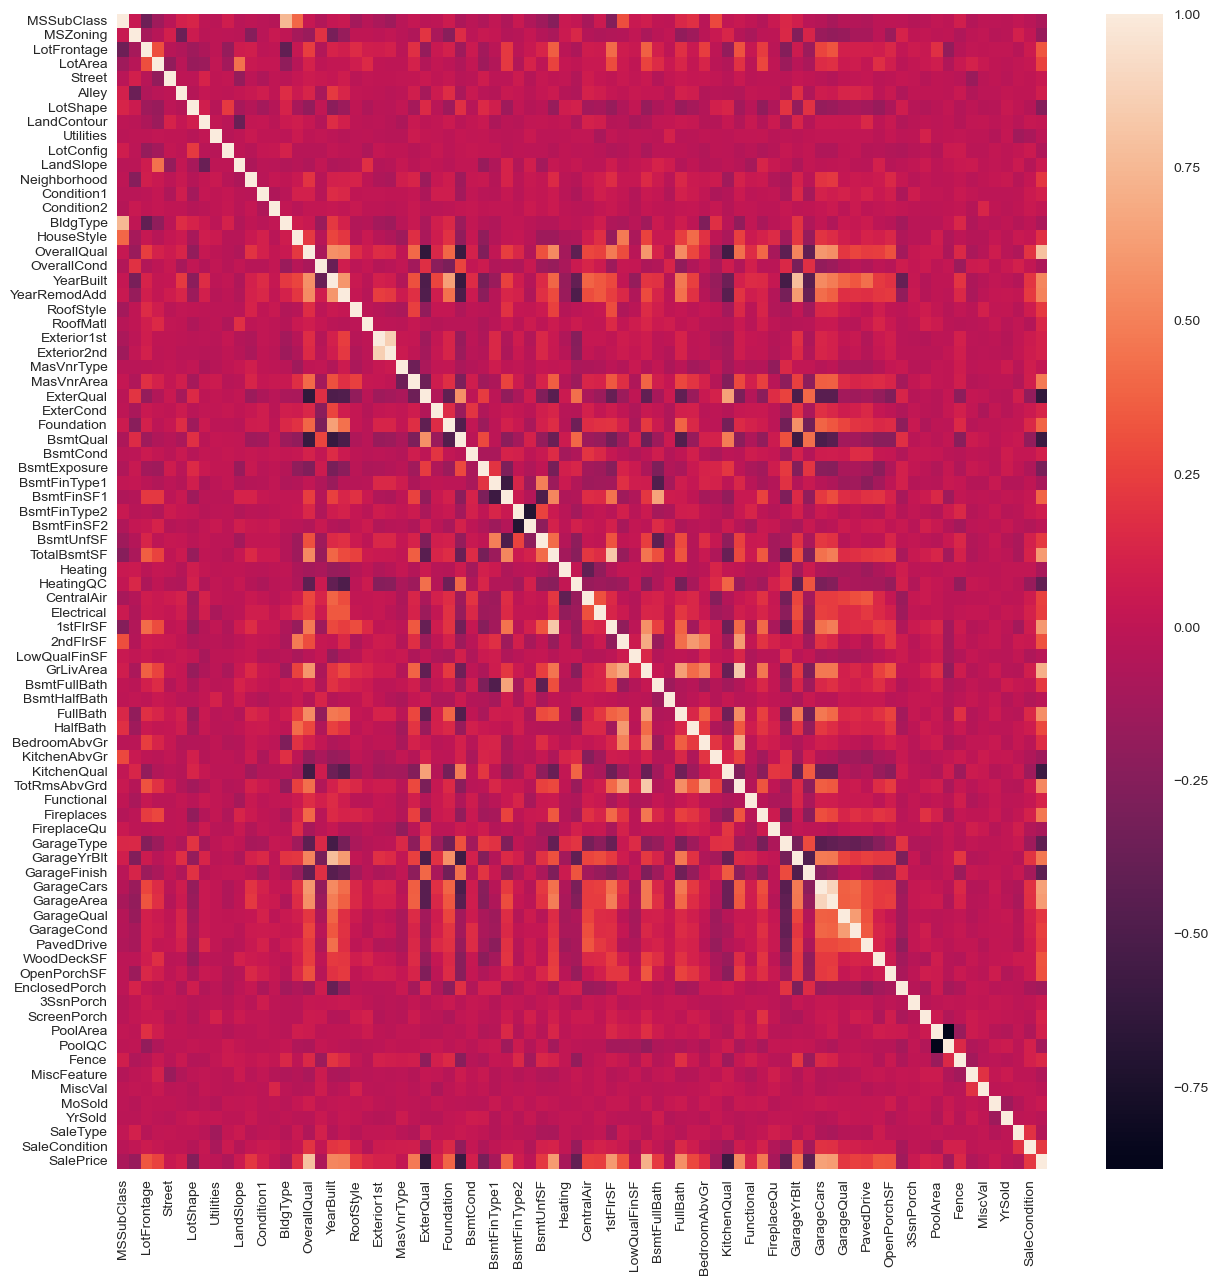

In [111]:
plt.figure(figsize=(15, 15))
corr = df.corr(method = 'pearson')

sns.heatmap(corr)
plt.show()

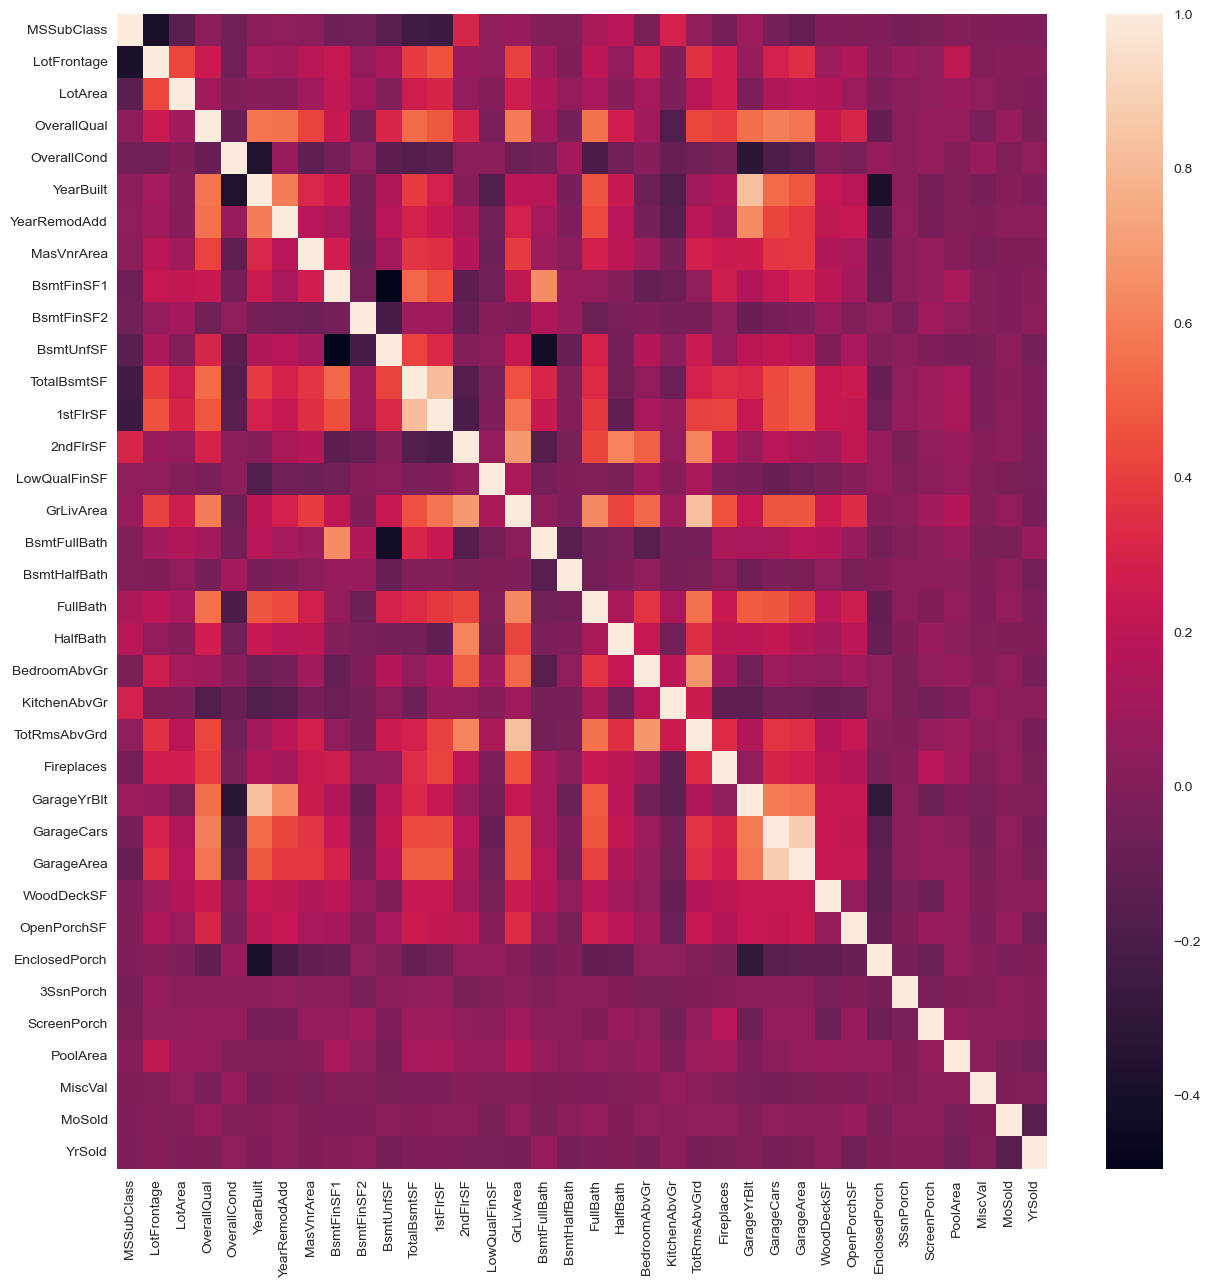

In [96]:
plt.figure(figsize=(15, 15))
corr = numericas.corr(method = 'pearson')

sns.heatmap(corr)
plt.show()

In [152]:
top10 = corr['SalePrice'].abs().sort_values(ascending=False).head(11)
top10

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
ExterQual      0.636884
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
BsmtQual       0.593734
KitchenQual    0.589189
FullBath       0.560664
Name: SalePrice, dtype: float64

## Train Test Split

In [113]:
X = df.drop(columns=["SalePrice"])
y = df['SalePrice']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Normalização**

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Modelagem

**Regressão Linear**

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [117]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20721.959184111314
MSE: 1790078754.2101305
RMSE: 42309.322308566116


**Regressao Ridge**

In [129]:
from sklearn.linear_model import Ridge

rm = Ridge(alpha=1.0 )
rm.fit(X_train, y_train)
predictions = rm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20638.903330215955
MSE: 1814239465.4984922
RMSE: 42593.89000195324


**Regressao Lasso**

In [130]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
predictions = lasso_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20715.62802295769
MSE: 1790548704.619868
RMSE: 42314.875689523986


**XGBoosting**

In [ ]:
!pip install xgboost


In [137]:
import xgboost as xg 

xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
  
# Predict the model 
predictions = xgb_r.predict(X_test) 
  
# RMSE Computation 
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19571.37908461758
MSE: 949795490.3040004
RMSE: 30818.752250926715


In [138]:
!pip install lightgbm


**LightGBM**

In [140]:
import lightgbm as lgb

params = {
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Criar o conjunto de dados de treinamento do LightGBM
train_data = lgb.Dataset(X_train,y_train)

# Treinar o modelo
model = lgb.train(params, train_data, num_boost_round=100)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrático
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003966 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2999
[LightGBM] [Info] Number of data points in the train set: 1022, number of used features: 70
[LightGBM] [Info] Start training from score 181608.593933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [91]:
!pip install pycaret
import pycaret
from pycaret.regression import *

In [94]:
caret_df = setup(data = df, target = "SalePrice", session_id=55)

,Description,Value
0,Session id,55
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 80)"
4,Transformed data shape,"(1460, 279)"
5,Transformed train set shape,"(1021, 279)"
6,Transformed test set shape,"(439, 279)"
7,Numeric features,36
8,Categorical features,43
9,Rows with missing values,100.0%


In [118]:
best_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,16185.9065,585424008.4704,23973.9569,0.9088,0.1325,0.0964,0.9030
ridge,Ridge Regression,17239.1959,662013276.6781,25382.4463,0.8967,0.1818,0.1045,0.4760
lightgbm,Light Gradient Boosting Machine,17127.9871,741200642.2455,26832.4757,0.8866,0.1351,0.0978,0.8050
lasso,Lasso Regression,17951.9291,724202255.2799,26705.7130,0.8863,0.1706,0.1101,0.5580
et,Extra Trees Regressor,18003.1031,798742224.7011,27870.1830,0.8779,0.1446,0.1056,1.5980
rf,Random Forest Regressor,18104.2943,799860985.3462,27937.4520,0.8772,0.1478,0.1071,1.5890
en,Elastic Net,19318.2199,868510432.2426,29110.5364,0.8660,0.1826,0.1167,0.7400
omp,Orthogonal Matching Pursuit,20507.2718,898771854.2332,29673.3662,0.8606,0.1968,0.1266,0.4610
ada,AdaBoost Regressor,24121.6546,1169468544.6741,33943.5584,0.8161,0.1977,0.1561,0.7130
br,Bayesian Ridge,23595.4508,1256474798.4753,35194.3381,0.8044,0.2067,0.1414,0.4750


Processing:   0%|          | 0/77 [00:00<?, ?it/s]